This explores the visualization of a CCF computed with different lag times.
This visualization should give a sense of how well a timeseires might be used to predict another.
A consistently high CCF magnitude at high lag is ideal.
This viz also reveals how the correlation between series might shift over time.
Ie one series may be a good predictor for only a short time.
This information may still be useful; eg if a changes in series utility changes slowly or predictably.

In [1]:
"""params"""
# TIME_SERIES_1 = "../../../test_data/generated/timeseries_binary_signal.csv"
# TIME_SERIES_2 = "../../../test_data/generated/timeseries_binary_signal_noisy.csv"
TIME_SERIES_1 = "../../../test_data/generated/sine_1.csv"
TIME_SERIES_2 = "../../../test_data/generated/sine_1.csv"

In [2]:
from plo7y.get_test_data import get_test_data
sig = get_test_data(TIME_SERIES_1)
sig_2 = get_test_data(TIME_SERIES_2)

In [3]:
"""plot input data"""
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].set_title("sig1")
axes[0].plot(sig)
axes[1].plot(sig_2)
axes[1].set_title("sig2")
fig.tight_layout()


/usr/local/lib/python3.5/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


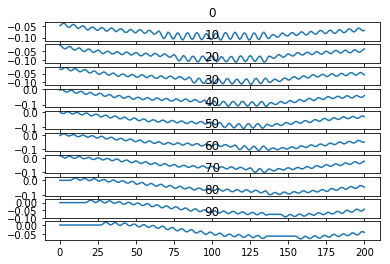

In [4]:
"""Plot w/ subplots"""
from plo7y.plotters.ccf_scipy import prep_dataframes
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

sig_len = 128

n_plots = 10
step_n = 10
fig, axes = plt.subplots(n_plots, 1, sharex=True)

for lag in range(0, n_plots*step_n, step_n):
    sig_2b = sig_2.shift(lag)
    sig, sig_2b = prep_dataframes(sig, sig_2b)
    sig_2b = np.nan_to_num(sig_2b)
    corr = signal.correlate(sig_2b, np.ones(sig_len), mode='same') / sig_len
#     print(corr)

    axes[int(lag/step_n)].set_title(lag)
    axes[int(lag/step_n)].plot(corr)

fig.tight_layout()



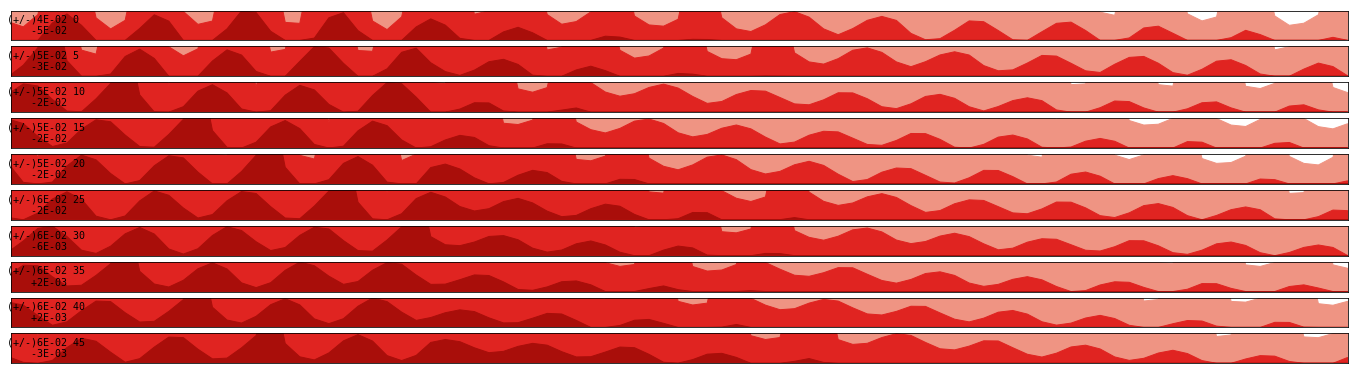

In [5]:
"""Plot w/ horizonplot"""
from plo7y.plotters.ccf_scipy import prep_dataframes
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd

sig_len = 128

n_plots = 10
step_n = 5

x_0 = min(sig)
x_f = max(sig)
dx = len(sig)
df = pd.DataFrame({"x": np.linspace(x_0, x_f, dx)})

lags = []
for lag in range(0, n_plots*step_n, step_n):
    sig_2b = sig_2.shift(lag)
    sig, sig_2b = prep_dataframes(sig, sig_2b)
    sig_2b = np.nan_to_num(sig_2b)
    corr = signal.correlate(sig_2b, np.ones(sig_len), mode='same') / sig_len
#     print(corr)
    df[str(lag)] = corr
    lags.append(str(lag))

    
from plo7y.plotters.ts_many_horizongraph import plot
plot(
    df, 'x', lags,
)



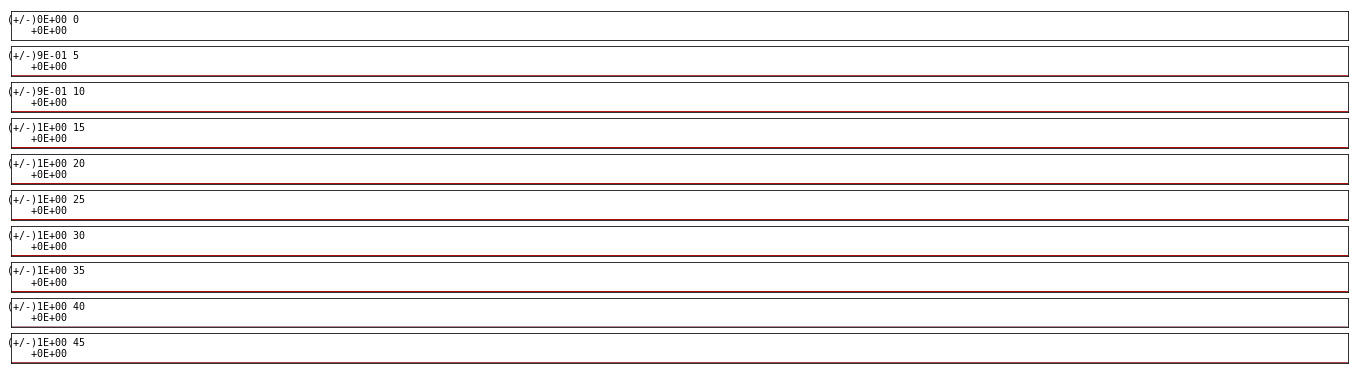

In [75]:
"""Plot w/ horizonplot"""
from plo7y.plotters.ccf_scipy import prep_dataframes
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd
import pyflux as pf

sig_len = 128

n_plots = 10
step_n = 5

x_0 = min(sig)
x_f = max(sig)
dx = len(sig)
df = pd.DataFrame({"x": np.linspace(x_0, x_f, dx)})

lags = []
df['sine1'] = sig
for lag in range(0, n_plots*step_n, step_n):
    sig_2b = sig_2.shift(lag)
    sig, sig_2b = prep_dataframes(sig, sig_2b)    
    df['sine2'] = sig_2b

    model = pf.ARIMAX(
        data=df, formula='sine1~1+sine2',
        ar=1, ma=1, family=pf.Normal()
    )
    x = model.fit("MLE")    
#     print(corr)
    model_data = np.append([0]*(lag+1), x.data)
    model_data = np.nan_to_num(model_data) - sig

    df[str(lag)] = model_data
    lags.append(str(lag))

    
from plo7y.plotters.ts_many_horizongraph import plot
plot(
    df, 'x', lags,
)



In [74]:
"""
Playing around with struct to find something useful...
"""
x.data  # == sig?
x.results  # result object
# x.scores # == None
# x.z  # latent variables
# dir(x)
# print(model.latent_variables)
# model.data  # == sig?
# model.predict()
# dir(model)


      fun: -3216.7479887825875
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.92104374e+09,  3.54367785e+01,  3.03093668e+09, -6.52388000e+08,
        2.63274160e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1026
      nit: 66
   status: 0
  success: True
        x: array([ 3.91250230e-08,  8.50097063e-01,  3.31102770e-08,  9.99999975e-01,
       -1.74368599e+01])